DataFrame Head:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0

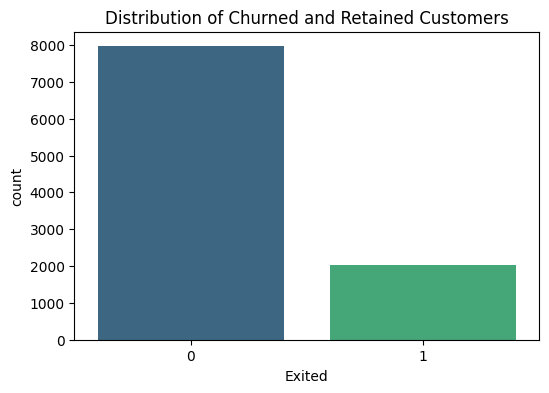


Confusion Matrix:
[[1541   66]
 [ 313   80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Accuracy Score:
0.8105


C:\Users\harin\AppData\Local\Temp\ipykernel_19068\1154739597.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')


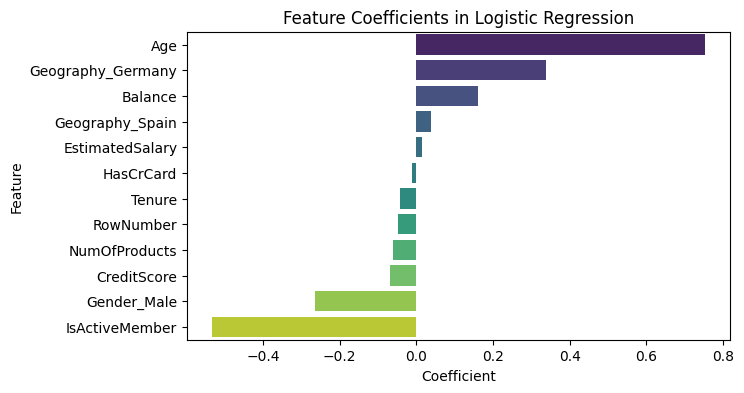

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Churn_Modelling.csv'
df = pd.read_csv(file_path)

# Check the data structure
print("DataFrame Head:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='viridis', hue='Exited', dodge=False)
plt.legend([], [], frameon=False)  # Hide the legend
plt.title('Distribution of Churned and Retained Customers')
plt.show()

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)

# Select relevant columns
X = df.drop(columns=['CustomerId', 'Surname', 'Exited'])
y = df['Exited']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Coefficients of Logistic Regression
coefficients = model.coef_[0]
features = X.columns
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Plot Feature Coefficients
plt.figure(figsize=(7, 4))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')
plt.title('Feature Coefficients in Logistic Regression')
plt.show()